In [178]:
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
movies_df = pd.read_csv('movie_lense/movies.csv')
ratings_df = pd.read_csv('movie_lense/ratings.csv')

In [7]:
data = list()
for idx,row in movies_df.iterrows():
    genres = row['genres'].split('|')
    for genre in genres:
        data.append([row['movieId'], genre])
movie_genre_df = pd.DataFrame(data, columns=['movieId', 'genre'])

In [209]:
all_genres = list(movie_genre_df.genre.unique())
all_genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [217]:
top_genres = pd.DataFrame(movie_genre_df.groupby('genre')['movieId'].count()).sort_values(by='movieId', ascending=False)


In [221]:
top_5_genres = list(top_genres[:5].index)
top_5_genres

['Drama', 'Comedy', 'Thriller', 'Romance', 'Action']

0 1 Drama Comedy
0 2 Drama Thriller
0 3 Drama Romance
0 4 Drama Action
1 2 Comedy Thriller
1 3 Comedy Romance
1 4 Comedy Action
2 3 Thriller Romance
2 4 Thriller Action
3 4 Romance Action


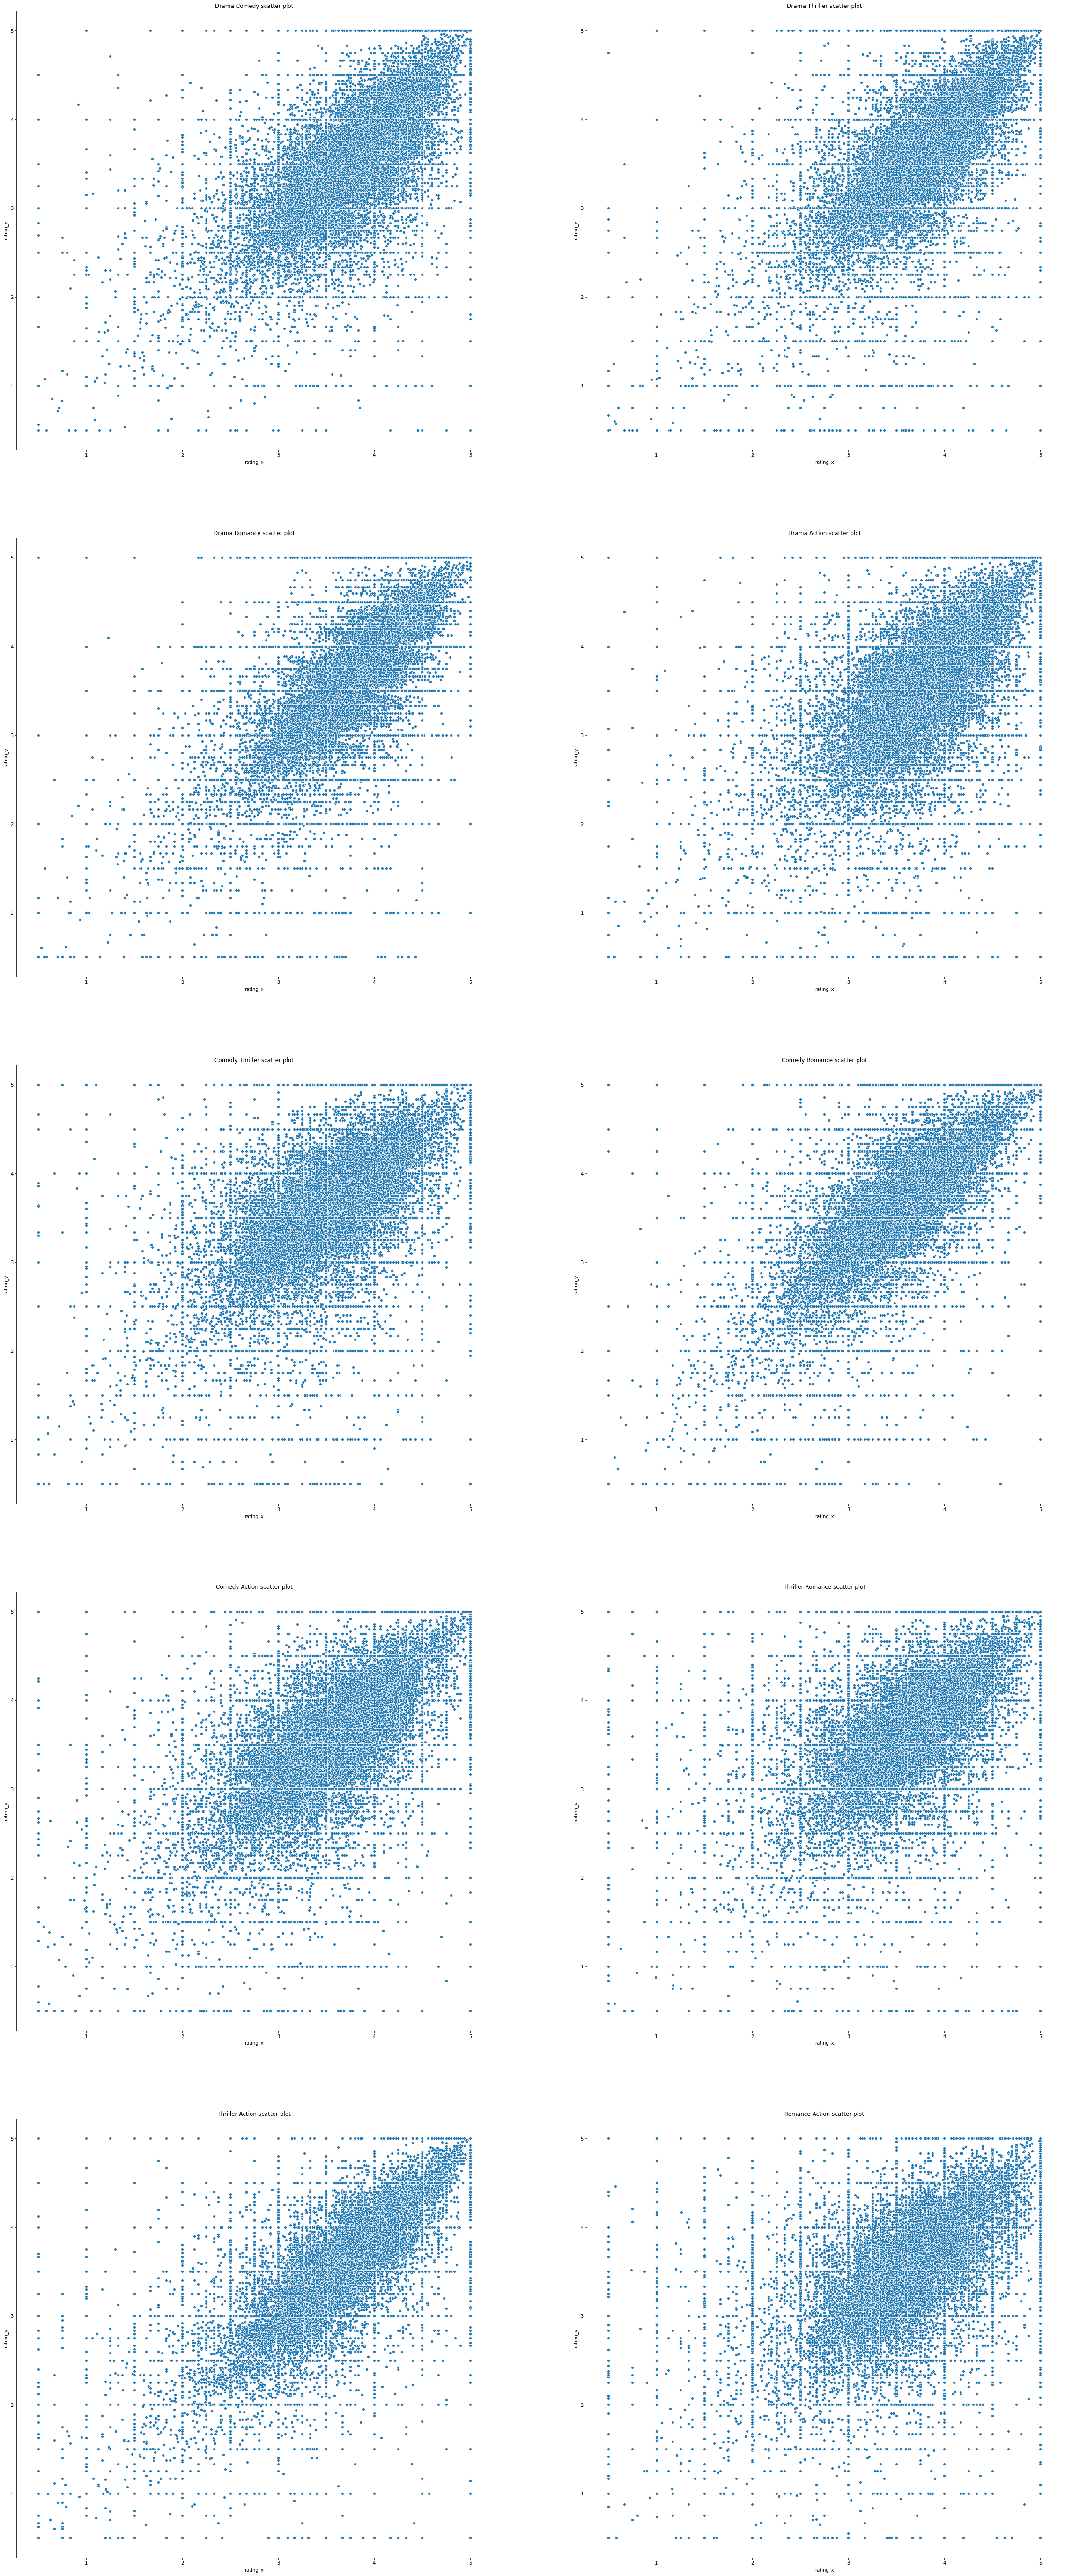

In [232]:
f, axes = plt.subplots(5, 2, figsize=(40,100))
i = 0
ax_i = 0
ax_j = 0
while i < 5:
    j = i + 1
    while j < 5:
        print(i, j, top_5_genres[i], top_5_genres[j])
        gen1 = ratings_df.loc[ratings_df['movieId'].isin(movie_genre_df.loc[movie_genre_df['genre'] == top_5_genres[i]]['movieId'])].groupby('userId')['rating'].mean()
        gen2 = ratings_df.loc[ratings_df['movieId'].isin(movie_genre_df.loc[movie_genre_df['genre'] == top_5_genres[j]]['movieId'])].groupby('userId')['rating'].mean()
        data = pd.merge(gen1, gen2, on='userId', how='inner')
        data = data.sample(frac=0.1)
        sns.scatterplot(x = 'rating_x', y='rating_y', data=data,ax=axes[ax_i][ax_j])
        axes[ax_i][ax_j].set_title(top_5_genres[i] + ' ' + top_5_genres[j] + ' scatter plot')
        ax_j += 1
        if ax_j == 2:
            ax_i += 1
            ax_j = 0
        j = j + 1
    i = i + 1

In [64]:
usr = pd.DataFrame(ratings_df.groupby('userId')['rating'].count()).sort_values(by='rating', ascending=False)

In [163]:
usr_ind = usr[:1000].index


In [164]:
mvs = pd.DataFrame(ratings_df.groupby('movieId')['rating'].count()).sort_values(by='rating', ascending=False)

In [165]:
mvs_ind = mvs[:1000].index


In [167]:
top_movie_users = ratings_df.loc[(ratings_df['userId'].isin(usr_ind)) & (ratings_df['movieId'].isin(mvs_ind))]


In [168]:
user_movie_ratings =  pd.pivot_table(top_movie_users, index='userId', columns= 'movieId', values='rating')


In [169]:
user_movie_ratings

movieId,1,2,3,5,6,7,10,11,16,17,...,116797,119145,122882,122886,122892,122904,134130,134853,152081,164179
userId,,,,,,,,,,,,,,,,,,,,,
214,3.0,NaN,3.0,NaN,5.0,NaN,3.0,3.0,4.0,NaN,...,3.0,NaN,NaN,3.0,NaN,NaN,4.0,4.0,NaN,4.0
235,5.0,3.0,NaN,NaN,4.0,NaN,5.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,3.0,2.0,NaN,NaN,2.0,2.0,3.0,3.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,3.5,NaN,NaN,NaN,NaN,2.0,NaN,4.0,2.5,NaN,...,4.0,3.0,NaN,2.5,NaN,NaN,NaN,3.5,NaN,3.5
1393,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.5,3.5,2.0,1.5,4.0,4.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281790,2.0,3.0,NaN,NaN,3.0,2.0,3.0,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282172,5.0,4.0,NaN,3.5,5.0,3.0,3.5,4.0,4.0,4.0,...,4.5,3.5,4.5,4.5,3.0,4.5,5.0,4.5,5.0,5.0
282374,3.0,NaN,NaN,NaN,3.0,NaN,3.5,NaN,NaN,NaN,...,3.5,3.5,3.0,3.5,NaN,4.5,3.5,NaN,3.0,5.0


In [170]:
user_movie_ratings_new = user_movie_ratings.fillna(0.0)

In [189]:
k_list= []
scores_iner = []
scores_dis = []
for k in range(1, 20):
    model = KMeans(n_clusters=k, algorithm='full').fit(user_movie_ratings_new)
    scores_dis.append(sum(np.min(cdist(user_movie_ratings_new, model.cluster_centers_, 'euclidean'),axis=1)) / user_movie_ratings_new.shape[0]) 
    scores_iner.append(model.inertia_) 
    k_list.append(k)

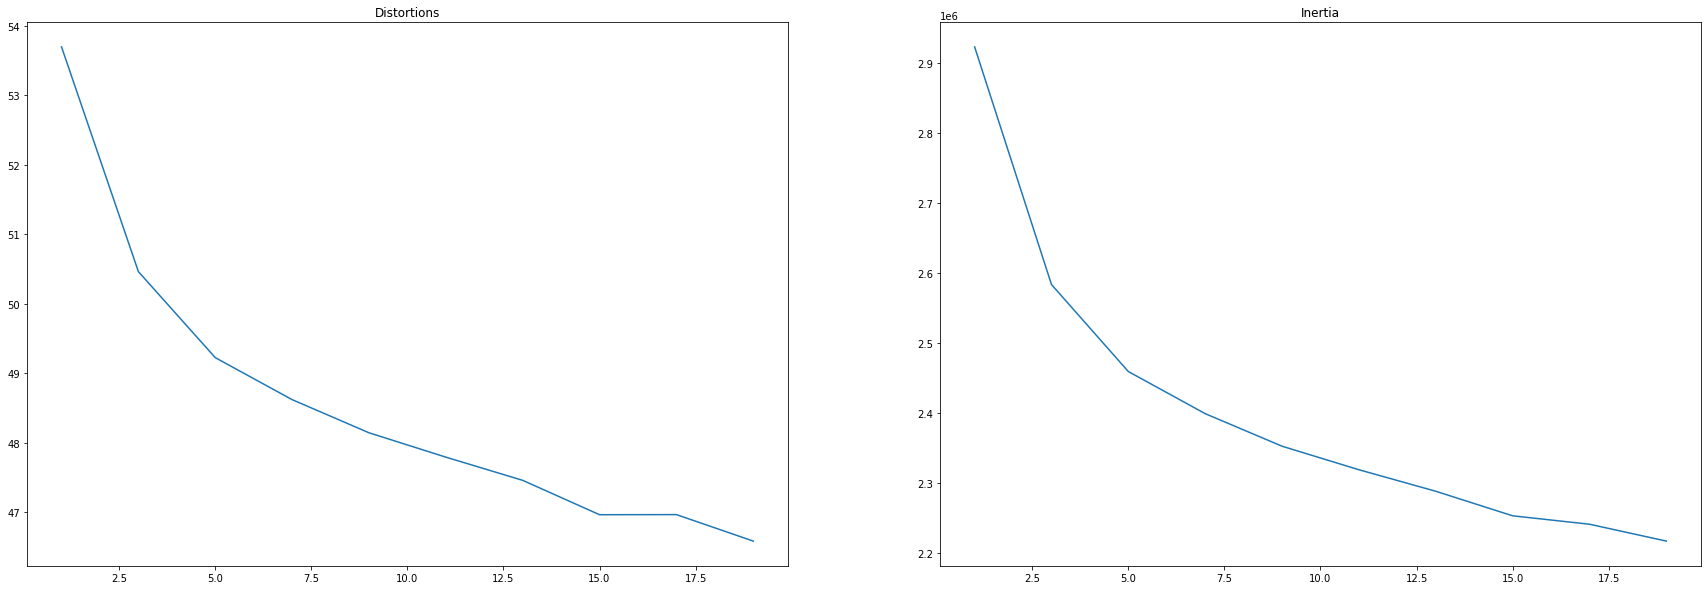

In [190]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

ax1.plot(k_list, scores_dis)
ax1.set_title("Distortions")

ax2.plot(k_list, scores_iner)
ax2.set_title("Inertia")

plt.show()

In [191]:
model = KMeans(n_clusters=10, algorithm='full').fit(user_movie_ratings_new)
predictions = model.predict(user_movie_ratings_new)

In [192]:
clustered = pd.concat([user_movie_ratings_new.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [193]:
clustered

,userId,1,2,3,5,6,7,10,11,16,...,119145,122882,122886,122892,122904,134130,134853,152081,164179,group
0,214,3.0,0.0,3.0,0.0,5.0,0.0,3.0,3.0,4.0,...,0.0,0.0,3.0,0.0,0.0,4.0,4.0,0.0,4.0,6
1,235,5.0,3.0,0.0,0.0,4.0,0.0,5.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,239,3.0,2.0,0.0,0.0,2.0,2.0,3.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,1272,3.5,0.0,0.0,0.0,0.0,2.0,0.0,4.0,2.5,...,3.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,3.5,3
4,1393,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,3.5,2.0,1.5,4.0,4.0,0.0,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,281790,2.0,3.0,0.0,0.0,3.0,2.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
996,282172,5.0,4.0,0.0,3.5,5.0,3.0,3.5,4.0,4.0,...,3.5,4.5,4.5,3.0,4.5,5.0,4.5,5.0,5.0,2
997,282374,3.0,0.0,0.0,0.0,3.0,0.0,3.5,0.0,0.0,...,3.5,3.0,3.5,0.0,4.5,3.5,0.0,3.0,5.0,6
998,283000,4.5,0.0,0.0,3.5,0.0,3.0,3.5,3.0,0.0,...,3.5,4.5,4.5,2.5,3.5,4.0,4.5,4.0,4.0,9


In [194]:
f = clustered[clustered.group==8].drop(['userId', 'group'], axis=1)

In [195]:
f

,1,2,3,5,6,7,10,11,16,17,...,116797,119145,122882,122886,122892,122904,134130,134853,152081,164179
23,3.0,3.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,...,3.5,4.0,3.5,4.0,4.0,4.0,4.0,0.0,3.5,3.5
36,4.0,0.0,0.0,0.0,4.5,4.5,3.0,4.0,3.5,0.0,...,3.0,4.5,5.0,4.5,3.5,3.5,5.0,4.0,3.0,5.0
48,5.0,4.0,4.0,4.0,4.0,0.0,4.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,4.5,3.5,0.0,0.0,4.0,3.0,3.5,3.5,4.0,0.0,...,4.5,4.0,4.0,4.0,4.0,5.0,4.0,0.0,3.0,4.5
86,5.0,5.0,4.0,0.0,5.0,0.0,0.0,4.0,4.0,0.0,...,5.0,5.0,0.0,5.0,3.0,3.0,5.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,4.5,5.0,3.5,3.5,4.0,1.5,0.0,0.0,5.0,0.0,...,0.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,0.0
936,4.5,3.5,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0,...,4.5,5.0,4.0,4.5,5.0,4.0,4.5,4.0,0.0,4.5
962,4.0,4.0,3.0,4.5,3.0,0.0,3.5,4.5,0.5,0.0,...,0.0,5.0,3.0,4.0,5.0,4.5,4.5,4.5,3.5,3.0
973,3.0,2.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,...,0.0,2.0,3.5,2.5,3.5,2.5,3.5,0.0,0.0,3.5


In [196]:
f[2].mean()

3.408536585365854